# **1. Interesting Topic Selection with 9+ categories**

**Topic: Traditional Clothing Recognition**

-	1	.	   "kimono (Japan)",
-	2	.	    "hanbok (South Korea)",
-	3	.	    "cheongsam/qipao (China)",
-	4	.	    "sari (India)",
-	5	.	    "thawb/dishdasha (Saudi Arabia)",
-	6	.	    "dirndl (Germany)",
-	7	.	    "kilt (Scotland)",
-	8	.	    "ao dai (Vietnam)",
-	9	.	    "boubou (West Africa)",
-	10	.	    "huipil (Mexico)",
-	11	.	    "sarong (Indonesia)",
-	12	.	    "chador (Iran)",
-	13	.	    "traje de flamenca (Spain)",
-	14	.	    "batik (Malaysia)",
-	15	.	    "thobe (Palestine)",
-	16	.	    "national dress (Norway)",
-	17	.	    "national costume (Philippines)",
-	18	.	    "barong tagalog (Philippines)",
-	19	.	    "abaya (United Arab Emirates)",
-	20	.	    "folkdräkt (Sweden)",
-	21	.	    "ao po'i (Paraguay)",
-	22	.	    "pounamu piupiu (New Zealand)",
-	23	.	    "kaftan (Morocco)"




Setting Up Neccessary things

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # Batch Size
version = 1

In [7]:
!pip install -Uqq fastai fastbook nbdev

In [8]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

**Mount Google Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/Master_Course_Data Science/LastAssignment

/content/drive/MyDrive/Master_Course_Data Science/LastAssignment


# **2. Data Collection, Model Training, Data Cleaning**

### **Fetch Data**

In [11]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,                                # get_image_file returns a list of all images in that path recursively by default
    splitter = RandomSplitter(valid_pct= 0.1, seed = 42),       # getting 80-20 train-validation split
    get_y = parent_label,                                       # taking the folder name as labels
    item_tfms= Resize(128)                                      # resizing to get the image of same shape
)

In [12]:
data_path = "data"

In [13]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale= 0.5), batch_tfms= aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"cloth_dataloader_v{version}.pkl")

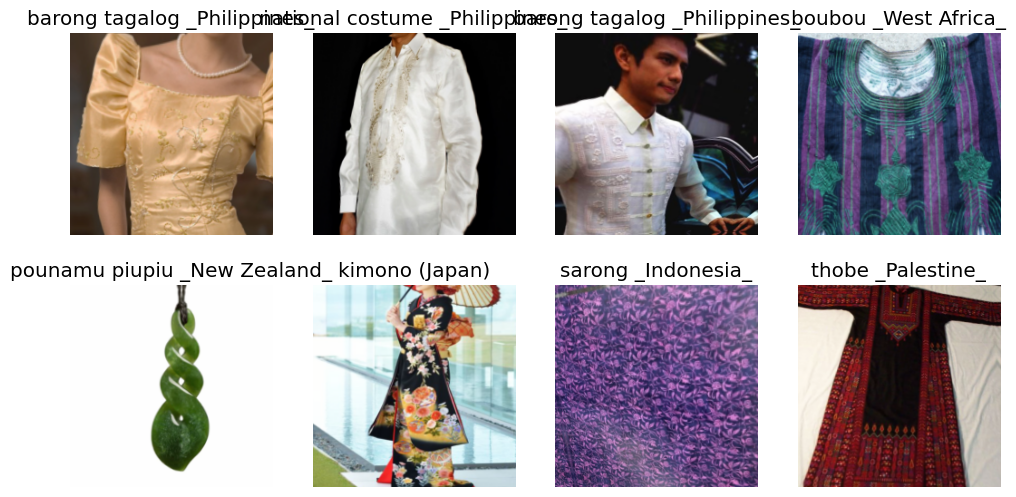

In [14]:
dls.train.show_batch(max_n = 8, nrows = 2)

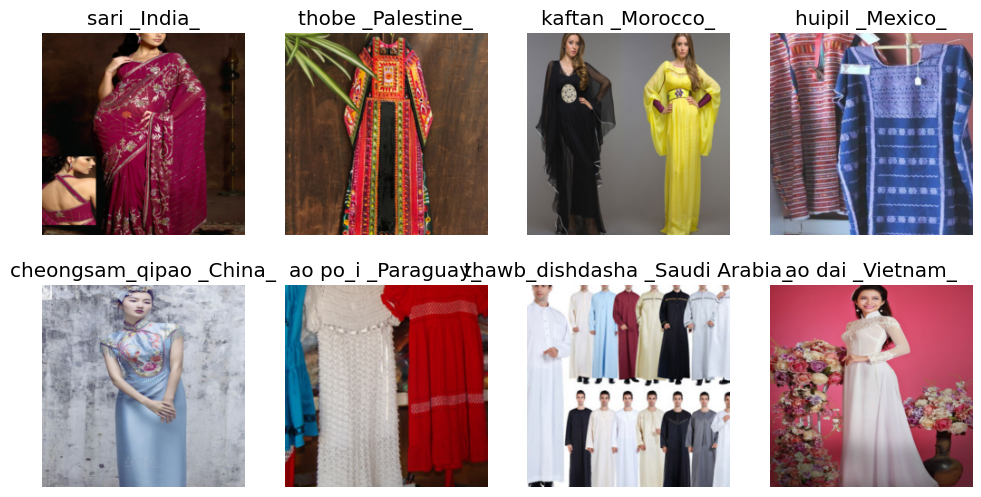

In [15]:
from PIL import UnidentifiedImageError

try:
    dls.valid.show_batch(max_n = 8, nrows = 2)
except UnidentifiedImageError as e:
    print(f"Error occurred while displaying batch: {str(e)}")

## **Model Training**

In [16]:
model_path = "model"

In [17]:
model = vision_learner(dls,  resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 67.6MB/s]


In [18]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.417236,1.399711,0.392694,0.607306,26:42


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.475377,1.102212,0.356164,0.643836,39:11


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
model.save(f"tradiotional_clothing_recognition-v{version}")

Path('models/tradiotional_clothing_recognition-v1.pth')

In [20]:
# model.load(f"tradiotional_clothing_recognition-v{version}")

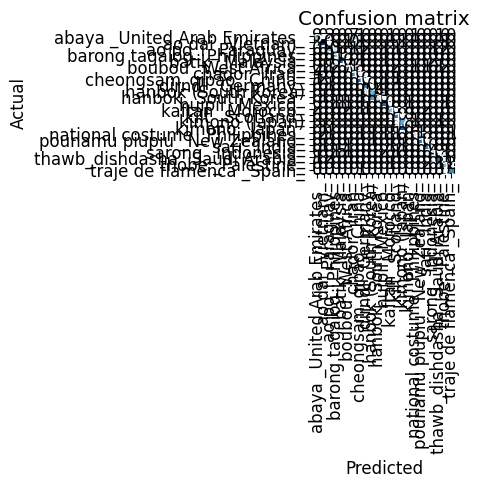

In [21]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

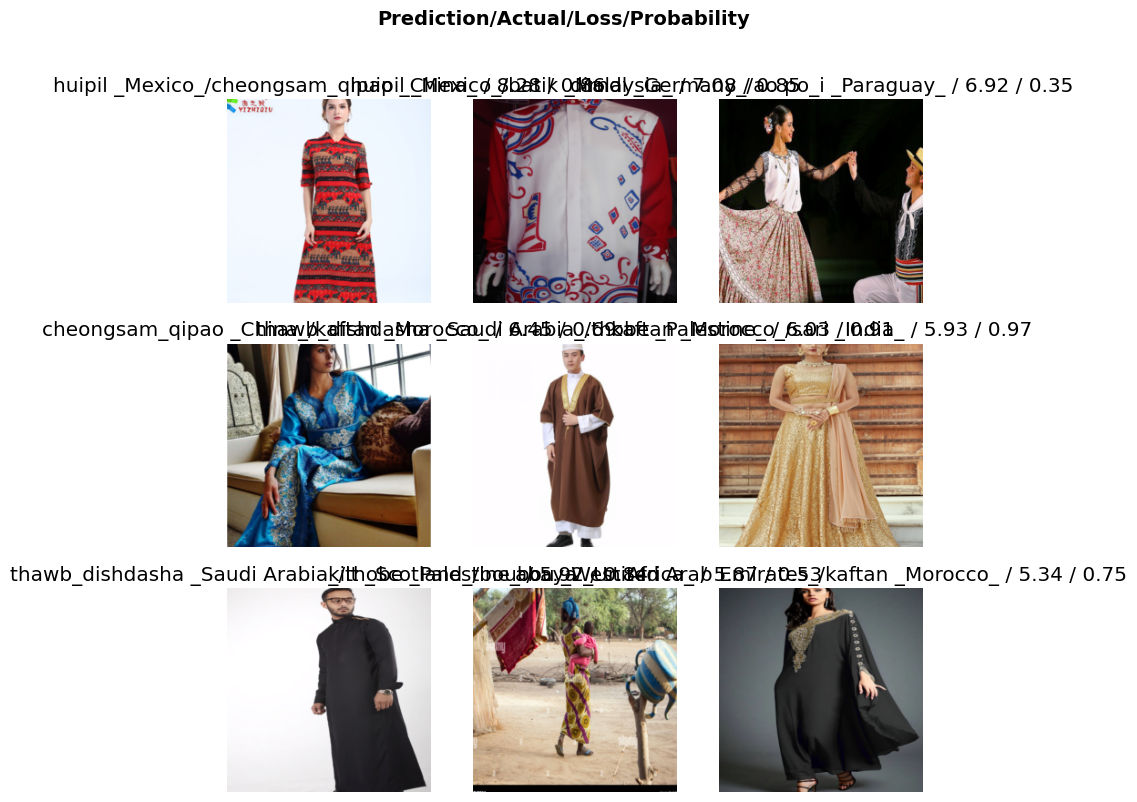

In [22]:
interp.plot_top_losses(9, nrows = 3)

In [23]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()  # Delete Irrelevant

for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")  # Change the directory


### **Export Model For Inference**

In [26]:
model_path = "models"
model.export(f"{model_path}/tradiotional_clothing_recognition-v{version}.pkl")